# 효율적인 성능 평가 방법
- K-Fold Cross Validation을 사용해 모델의 성능을 예측 및 성능 평가하기

- 회귀

# 0. 라이브러리 불러오기 및 데이터 준비하기

In [43]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [44]:
# 데이터 읽어오기
path = '../data/boston.csv'
data = pd.read_csv(path)

data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# 1. 데이터 파악하기

In [45]:
# 데이터 살펴보기
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [46]:
# 기술통계 확인
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 2. 데이터 전처리

**1) x, y 분리**

In [47]:
# Target 확인
target = 'medv'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**2) 학습용, 평가용 데이터 분리**

In [48]:
# 라이브러리 불러오기
from sklearn.model_selection import train_test_split

# 학습용, 평가용 데이터 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**3) 정규화**

In [49]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

# 3. 성능 예측하기
- cross_val_score(model, x_train, y_train, cv=n) 형태로 사용
- cv 옵션에 k값(분할 개수, 기본값=5)을 지정한다.
- cross_val_score 함수는 넘파이 배열 형태의 값을 반환한다.
- cross_val_score 함수 반환 값의 평균을 해당 모델의 예측 성능으로 볼 수 있다.

In [50]:
# 성능 기록하기
result=dict()

**1) Decision Tree**

In [51]:
# 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

# 선언하기
model = DecisionTreeRegressor(random_state=1)

# 검증하기
cv_score = cross_val_score(model, x_train, y_train, cv=10)

# 확인
print(cv_score)
print(f'평균 : {cv_score.mean()}')
print(f'표준편차 : {cv_score.std()}')

# 기록하기
result['DecisionTree'] = cv_score.mean()

[0.65714654 0.60626309 0.90288602 0.81947244 0.2399945  0.78389795
 0.78738545 0.76528187 0.84699641 0.807198  ]
평균 : 0.7216522274237595
표준편차 : 0.1802810189405804


**2) KNN**

In [52]:
# 불러오기
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score 

# 선언하기
model = KNeighborsRegressor()

# 검증하기
cv_score = cross_val_score(model, x_train_s, y_train, cv=10)

# 확인
print(cv_score)
print(f'평균 : {cv_score.mean()}')
print(f'표준편차 : {cv_score.std()}')

# 기록하기
result['KNN'] = cv_score.mean()

[0.65736358 0.52515086 0.75283937 0.44262082 0.78083425 0.64172252
 0.56042514 0.65223096 0.4254619  0.81733353]
평균 : 0.6255982942610578
표준편차 : 0.12919047046510435


**3) Linear Regression**

In [53]:
# 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# 선언하기
model = LinearRegression()

# 검증하기
cv_score = cross_val_score(model, x_train, y_train, cv=10, scoring='r2')

# 확인
print(cv_score)
print(f'평균 : {cv_score.mean()}')
print(f'표준편차 : {cv_score.std()}')

# 기록하기
result['Linear Regression'] = cv_score.mean()

[0.5902904  0.41961248 0.83104808 0.6505844  0.77425826 0.5677654
 0.67492701 0.77482185 0.57495364 0.82335863]
평균 : 0.6681620144824072
표준편차 : 0.1265754600360094


# 4. 성능 비교하기

In [54]:
# 성능 확인하기
result

{'DecisionTree': 0.7216522274237595,
 'KNN': 0.6255982942610578,
 'Linear Regression': 0.6681620144824072}

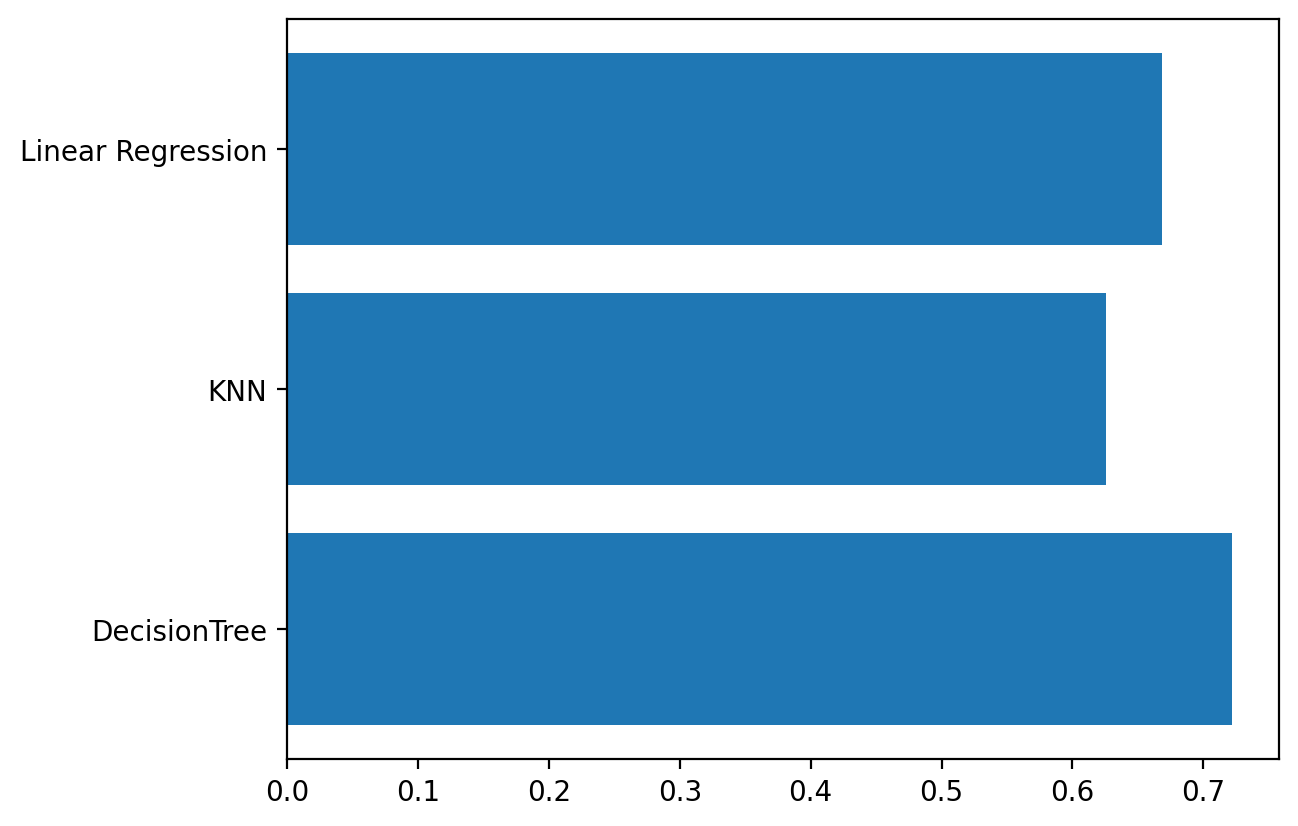

In [55]:
# 성능 비교 시각화
plt.barh(y=list(result), width=result.values())
plt.show()

# 5. 성능 평가

위에서 DecisionTree가 성능이 가장 높으므로,  
이를 바탕으로 학습 및 평가를 해보자

In [56]:
# 라이브러리 불러오기
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 모델 선언
model = DecisionTreeRegressor(random_state=1)

# 학습
model.fit(x_train,y_train)

# 예측
y_pred = model.predict(x_test)

# 평가
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
print(f"R2 : {r2_score(y_test, y_pred)}")

MAE : 2.636184210526315
R2 : 0.8623771688778322
